
# Blight Fight Capstone Project

"Urban blight refers to the deterioration and decay of buildings and older areas of large cities, due to neglect, crime, or lack of economic support. This is a typical sight in most US cities, and in many cities throughout the world. As a city gets older, some buildings or properties are not maintained and become run-down, abandoned or condemned." [1] 

Many cities are actively trying to predict which properties are likely to become officially classified as blighted ahead of time. Predicting which properties are likely to be classified as blight can help cities take preventative action: a targeted demolition or renovation can prevent the spread of urban blight and facilitate economic revitalization of often distressed areas. The city of Detroit is one city interested in taking these measures, and city planners are actively pursuing blight prediction models. The city of Detroit also, like many cities, maintains an open data portal where data is published, often in live streams, to empower outside analysts to assist in problem solving and application construction. 

In this assignment, you will work with real data to help urban planners predict blight.  This is a real-world problem: the data will not be perfectly clean, the questions will not be perfectly unambiguous, and your results will not be perfectly reliable. But your work has the potential  to help improve one city’s economic future, and perhaps lead to a number of other cities following suit.  And, we think you’ll learn a lot!

## Week 1: Background and Preparation

### Get the Data

The data for the project is available in the [github repository](https://github.com/uwescience/datasci_course_materials/capstone/blight/data).

Additional data sets may be used in step 5. Up-to-date data can be downloaded or accessed via API from: data.detroitmi.gov

There are four files:
* `detroit-blight-violations.csv` : Each record is a blight violation incident.
* `detroit-demolition-permits.tsv` : Each record represents a permit for a demolition.
* `detroit-311.csv` : Each record represents a 311 call, typically a complaint
* `detroit-crime.csv` : Each record represents a criminial incident.

For each incident type, the location is included as a latitude, longtiude pair and various timestamps are included, typically in the format mm/dd/yyyy hh:mm:ss PM, for example 03/11/2015 04:23:11 PM.

### Understand the Domain

Typically you will want to interact closely with domain expert stakeholders, but in some cases you may be asked to brush up on a new domain on your own.

Find some articles on blight and abandonment, the problems they cause, actions typically taken by city planners, prior approaches to prediction, and any equity or ethics considerations.

Some articles you may find useful:
* [Spatial distribution of abandonment](readings/morckel_spatial_characteristics_of_housing_abandonment.pdf)
* [Early statistical approaches to predicting blight](readings/Hillier_et_al-2003-Journal_of_Urban_Affairs.pdf)
* [The relationship between abandonment and crime](readings/RALEIGH_et_al-2015-Journal_of_Urban_Affairs.pdf)
* [Detroit demolishes its ruins: 'The capitalists will take care of the rest'](http://www.theguardian.com/money/2014/sep/28/detroit-demolish-ruins-capitalists-abandoned-buildings-plan)

### Discussion Prompt: 

Share your background, interest, and goals for this Capstone Project, and any questions or considerations from your domain research.  How important is this problem?  How accurate do you think the models will be?  What kinds of concerns might there be around equity?  For example, in some cities, 311 calls may be rare in poor neighborhoods, so a model that predicts abandonment that uses 311 calls may favor certain neighborhoods over others. 


## Week 2. Create a list of "buildings" from a list of geo-located incidents

All data files consist of incident data: each record is an incident which occurred at a particular time and place. 

The location of each incident is provided as geo-coordinates: a (latitude, longitude) pair.  The project involves classifying the blight risk of specific buildings, so a first step is to parse the geo coordinate data and use these coordinates to try to cluster all incidents that occurred, ideally, at the same address. Note that the data is messy!  You’ll need to be creative to try to assemble your best guess of what constitutes a building. 

Plan to spend some time visualizing the incident data to gain an intuition about the problem. In particular, consider creating maps using, say, [Google maps](https://www.google.com/maps) for [displaying a specific lat/lon location](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=(42.36318237000006, -83.09167672099994)) or [CartoDB](https://cartodb.com/).  You may of course also want to create non-spatial visualizations using, say, [Google Fusion Tables](https://support.google.com/fusiontables/answer/2571232) or [Tableau](http://www.tableau.com/), or libraries such as [vega-lite](https://github.com/vega/vega-lite), [bokeh](http://bokeh.pydata.org/), [matplotlib](http://matplotlib.org/), or R.  Posting your visualizations online and discussing them in the forum is encouraged!!!

### Milestone:
1. Create a file where each record represents a building. In most approaches, each building will be associated with some spatial extent so that you can determine which incidents will be assigned to it.  One way to define a spatial extent to encode a rectangle centered on the building, such that your records are of the form building_id, lower_left_latitude, lower_left_longitude, upper_right_latitude, upper_right_longitude. You might also use a circle by associating each building with a center and a radius.  Whatever you choose, you may need to consider how to handle incidents that fall outside of any bulding extent or incidents that fall within multiple building extents.  

2. Write a function that, given a latitude and longitude, returns one or more buildings associated with that location. This function will use the information in the building file you created.

### Assignment: Answer the following questions and submit for peer review. Your peer rviewers will offer suggestions and feedback.

1. What tools are you using?  Are you using any special libraries to work with spatial data?  How are you visualizing the data?

2. What outliers are you noticing? Consider what might be causing these outliers, and how you might specially address them.

3. How did you use the geocoordinates to define a "building"? How might you need to change your approach if you were working with 100x the number of incidents?

4. How might your solution change if conditions of the problem change?  Would you face scalability issues if you were working with 100x the number of incidents?  Would high-density areas like Manhattan in New York City make differentiation between buildings more difficult?  Are there heuristics used about how buildings tend to be arranged geometrically that may be violated in certain places?  None of these issues are necessarily a problem, but the more general the solution, the more likely it is to be used in additional cities.

5. Did you treat all incident types the same in determining whether to include them in the temporal history of a building? If not, why not?

## Milestone 3: Construct a training dataset

To train a supervised model, you need ground truth labels.  That is, you need a set of buildings that are pre-labeled as either blighted or not blighted.  And you need about as many positive examples as you do negative examples, or your model will not perform well.  There will be many, many more non-blighted buildings than blighted, so you will need to randomly select non-blighted buildings to include, and your model might be sensitive to this sampling.

For Milestone 2, you used the set of incidents across all files to create a list of buildings.  
Each record in the file detroit-demolition-permits.tsv represents a permit issued in the city of Detroit. You may assume a building is blighted if at least one permit incident marked 'Dismantle' can be assigned to that building.

You will be ignoring all 'Dismantle' incidents when evaluating your model. (Why?)

### Milestone: 
1. Produce a file where each record is of the form building_id, label, where label is either blighted or not_blighted. Ensure that about 50% of the buildings are blighted and 50% are not.  We have not created the features yet, so this file is not useful, but this step will ensure you can extract the labels, and you will follow a similar pattern for the features.

### Assignment: Answer the following questions and submit for peer review.

1. Why is it in important to ignore the 'Dismantle' incidents during evaluation?
 
2. Could our labels be incorrect?  If you were paid to pursue this project, how might you double check that your labels were accurately reflecting ground truth?

3. How many blighted buildings did you come up with?

## Week 4: Train and evaluate a simple model

You will build a tirival model based on a single feature: the number of records in `detroit-blight-violations.csv` associated with that building.

For each record in `detroit-blight-violations.csv`, find the corresponding building and increment a counter.


### Milestone: 

Using scikit-learn in python (or R, if you wish), write a program to train a model and evaluate it using 5-fold cross validation.  Evaluate your model using its accuracy. Use regression, a decision tree, or any other appropriate model.  


### Assignment: Answer the following questions an submit for peer review:

1. What method did you use to learn the relationship?

2. Does this model seem to work?  How well?

3. What other properties of a building might help predict blight?  

4. Is accuracy the only way to evaluate the model?


## Week 5: Feature Engineering

For each building, you need to extract a richer set of features from the incident data and construct a feature vector.  The feature vector will include at least two columns: the building_id and the label.  You will create many additional columns that the model will use to predict the label.  These features may be numeric, text-derived, or otherwise computed.  Feature engineering is what makes or breaks analytics projects, not the method.  

Your results will be highly dependent on the features you select -- you should expect to return to this step as you iterate.


### Assignment: Answer the following questions and submit for peer review.

1. What features did you use? How did you select them? Did you leverage a corpus wide normalization? If so, why?

2. What types of features would you pursue if you had more time? Why do you think these features might improve the accuracy of your model?


## Week 6: Extensions

Using data.detroitmi.gov or other inline sources, identify additional datasets from which you can derive additional features that may help you improve your model.

### Assignment: Submit a brief report describing your features, your method, and the accuracy of the model.  If you believe your solution works especially well and would like it to be reviewed by stakeholders in the City of Detroit and Socrata, upload your code to a public github repository and provide the url here.




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
import geopy.geocoders
# from sklearn.cluster import
import math
from geopy.extra.rate_limiter import RateLimiter
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from tqdm import tqdm_notebook as tqdm
import pickle

In [2]:
violations = pd.read_csv('data/detroit-blight-violations.csv')
permits = pd.read_csv('data/detroit-demolition-permits.tsv',sep='\t')
complaints = pd.read_csv('data/detroit-311.csv')
crimes = pd.read_csv('data/detroit-crime.csv')

/home/ishaan/ishaan/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ishaan/ishaan/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
violations.head()

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,...,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,...,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."


In [4]:
violations.columns

Index(['TicketID', 'TicketNumber', 'AgencyName', 'ViolName',
       'ViolationStreetNumber', 'ViolationStreetName', 'MailingStreetNumber',
       'MailingStreetName', 'MailingCity', 'MailingState', 'MailingZipCode',
       'NonUsAddressCode', 'Country', 'TicketIssuedDT', 'TicketIssuedTime',
       'HearingDT', 'CourtTime', 'ViolationCode', 'ViolDescription',
       'Disposition', 'FineAmt', 'AdminFee', 'LateFee', 'StateFee',
       'CleanUpCost', 'JudgmentAmt', 'PaymentStatus', 'Void',
       'ViolationCategory', 'ViolationAddress', 'MailingAddress'],
      dtype='object')

In [5]:
violations.isna().sum()

TicketID                      0
TicketNumber                  0
AgencyName                    0
ViolName                      2
ViolationStreetNumber         0
ViolationStreetName           0
MailingStreetNumber           2
MailingStreetName             0
MailingCity                 422
MailingState                888
MailingZipCode              427
NonUsAddressCode         307379
Country                  289320
TicketIssuedDT                0
TicketIssuedTime              0
HearingDT                     0
CourtTime                     0
ViolationCode                 0
ViolDescription               0
Disposition                   0
FineAmt                    1973
AdminFee                      0
LateFee                       0
StateFee                      0
CleanUpCost                   0
JudgmentAmt                1972
PaymentStatus                 0
Void                     208671
ViolationCategory             0
ViolationAddress              0
MailingAddress             2078
dtype: i

In [6]:
crimes.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)"
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)"
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)"
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)"
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)"


In [7]:
crimes.isna().sum()

ROWNUM                       0
CASEID                       0
INCINO                       0
CATEGORY                     0
OFFENSEDESCRIPTION           8
STATEOFFENSEFILECLASS        8
INCIDENTDATE                 0
HOUR                         0
SCA                        771
PRECINCT                   771
COUNCIL                   4122
NEIGHBORHOOD              4659
CENSUSTRACT              13045
ADDRESS                      0
LON                         59
LAT                         59
LOCATION                     0
dtype: int64

In [8]:
complaints.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN


In [9]:
complaints.isna().sum()

ticket_id                            0
city                                 0
issue_type                           0
ticket_status                        0
issue_description                 4464
rating                               0
ticket_closed_date_time           3175
acknowledged_at                   2023
ticket_created_date_time             0
ticket_last_updated_date_time        0
address                              0
lat                                  0
lng                                  0
location                             0
image                            15578
dtype: int64

In [10]:
permits.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,...,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [11]:
permits.isna().sum()

PERMIT_NO                    0
PERMIT_APPLIED               0
PERMIT_ISSUED                0
PERMIT_EXPIRES             180
SITE_ADDRESS                 0
BETWEEN1                    42
PARCEL_NO                    0
LOT_NUMBER                  71
SUBDIVISION               1046
CASE_TYPE                    0
CASE_DESCRIPTION             0
LEGAL_USE                  444
ESTIMATED_COST            6791
PARCEL_SIZE                 45
PARCEL_CLUSTER_SECTOR       11
STORIES                   1426
PARCEL_FLOOR_AREA           45
PARCEL_GROUND_AREA          45
PRC_AKA_ADDRESS           6840
BLD_PERMIT_TYPE              0
PERMIT_DESCRIPTION        1274
BLD_PERMIT_DESC            991
BLD_TYPE_USE                52
RESIDENTIAL                  0
DESCRIPTION               1274
BLD_TYPE_CONST_COD         201
BLD_ZONING_DIST           4719
BLD_USE_GROUP              445
BLD_BASEMENT               856
FEE_TYPE                     0
CSM_CASENO                   0
CSF_CREATED_BY               0
SEQ_NO  

In [12]:
permits.columns

Index(['PERMIT_NO', 'PERMIT_APPLIED', 'PERMIT_ISSUED', 'PERMIT_EXPIRES',
       'SITE_ADDRESS', 'BETWEEN1', 'PARCEL_NO', 'LOT_NUMBER', 'SUBDIVISION',
       'CASE_TYPE', 'CASE_DESCRIPTION', 'LEGAL_USE', 'ESTIMATED_COST',
       'PARCEL_SIZE', 'PARCEL_CLUSTER_SECTOR', 'STORIES', 'PARCEL_FLOOR_AREA',
       'PARCEL_GROUND_AREA', 'PRC_AKA_ADDRESS', 'BLD_PERMIT_TYPE',
       'PERMIT_DESCRIPTION', 'BLD_PERMIT_DESC', 'BLD_TYPE_USE', 'RESIDENTIAL',
       'DESCRIPTION', 'BLD_TYPE_CONST_COD', 'BLD_ZONING_DIST', 'BLD_USE_GROUP',
       'BLD_BASEMENT', 'FEE_TYPE', 'CSM_CASENO', 'CSF_CREATED_BY', 'SEQ_NO',
       'PCF_AMT_PD', 'PCF_AMT_DUE', 'PCF_UPDATED', 'OWNER_LAST_NAME',
       'OWNER_FIRST_NAME', 'OWNER_ADDRESS1', 'OWNER_ADDRESS2', 'OWNER_CITY',
       'OWNER_STATE', 'OWNER_ZIP', 'CONTRACTOR_LAST_NAME',
       'CONTRACTOR_FIRST_NAME', 'CONTRACTOR_ADDRESS1', 'CONTRACTOR_ADDRESS2',
       'CONTRACTOR_CITY', 'CONTRACTOR_STATE', 'CONTRACTOR_ZIP',
       'CONDITION_FOR_APPROVAL', 'site_location',

In [13]:
len(violations)

307804

In [14]:
len(crimes)

119931

In [15]:
len(permits)

7133

In [16]:
len(complaints)

19680

# Extracting locations

## Violation Data

In [17]:
locations = violations['ViolationAddress'].str.split('\n',expand=True)
locations2 = violations['MailingAddress'].str.split('\n',expand=True)
locations[['LAT','LONG']]=locations.iloc[:,2].str.replace("(","").str.replace(")","").str.split(",",expand=True)
locations2[['LAT','LONG']]=locations.iloc[:,2].str.replace("(","").str.replace(")","").str.split(",",expand=True)

In [18]:
locations.drop(2, inplace=True,axis=1)
locations2.drop(2, inplace=True,axis=1)

In [19]:
locations['address'] = locations[0] + ',' + locations[1]
locations2['address'] = locations2[0] + ',' + locations2[1]

In [20]:
# locations['address'] = locations['address'].str.replace(' ',",")
# locations2['address'] = locations2['address'].str.replace(' ',",")

In [21]:
locations.drop([0,1],axis=1,inplace=True)
locations2.drop([0,1],axis=1,inplace=True)

In [22]:
locations.head()

,LAT,LONG,address
0,42.36318237000006,-83.09167672099994,"2566 GRAND BLVD,Detroit, MI"
1,42.429390762000025,-83.22039357799997,"19014 ASHTON,Detroit, MI"
2,42.428707459000066,-83.22754809599996,"18735 STAHELIN,Detroit, MI"
3,42.44169828400004,-83.14501821599998,"20125 MONICA,Detroit, MI"
4,42.42031769500005,-83.14532817999998,"17397 PRAIRIE,Detroit, MI"


In [23]:
violations[['V_LAT','V_LONG','V_addr']] = locations
violations[['M_LAT','M_LONG','M_addr']] = locations2

In [24]:
locations = pd.concat([locations,locations2],axis=0)

In [25]:
locations.groupby(['LAT','LONG']).count().sort_values('address',ascending=False).head(10)

,,address
LAT,LONG,
42.33168113800008,-83.04799603699996,42128
42.33438171200004,-83.21603845099997,8922
42.415907437000044,-83.12130742199997,3981
42.34527907900008,-83.21652410599995,3417
42.345632866000074,-83.00881230999994,2736
42.35322741400006,-83.08587461999997,2273
42.38949192100006,-83.00924186699996,1510
42.37507307900006,-83.11454665499997,1482
42.328933300000074,-83.22547235699994,1277


In [26]:
locations.shape

(615608, 3)

In [27]:
locations = locations.drop_duplicates(['LAT','LONG'])

In [28]:
locations.shape

(96314, 3)

## Complaints Data

In [29]:
complaints[['lat','lng','location']].head(10)

,lat,lng,location
0,42.383998,-83.161039,"(42.3839977668, -83.1610385642)"
1,42.440471,-83.080919,"(42.4404708, -83.080919)"
2,42.445244,-82.962038,"(42.445244, -82.962038)"
3,42.421043,-83.166194,"(42.421043, -83.166194)"
4,42.402033,-83.162874,"(42.4020334, -83.1628741)"
5,42.399431,-83.158100,"(42.399431, -83.1581)"
6,42.439669,-83.240740,"(42.439669, -83.24074)"
7,42.430693,-83.053367,"(42.4306931, -83.0533671)"
8,42.410764,-83.161803,"(42.410764, -83.161803)"
9,42.437114,-83.152779,"(42.437114, -83.152779)"


In [30]:
complaints_loc = complaints[['address','location']]

In [31]:
complaints_loc[['LAT','LONG']] = complaints_loc.iloc[:,1].str.replace("(","").str.replace(")","").str.split(",",expand=True)
complaints_loc.head()

/home/ishaan/ishaan/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,address,location,LAT,LONG
0,"13120-13130 Ilene Street Detroit, MI 48238, USA","(42.3839977668, -83.1610385642)",42.3839977668,-83.1610385642
1,"1485 E. Outer Drive Detroit, Michigan","(42.4404708, -83.080919)",42.4404708,-83.080919
2,"15460 Eastburn Detroit, Michigan","(42.445244, -82.962038)",42.445244,-82.962038
3,"17541 Mendota St Detroit, Michigan","(42.421043, -83.166194)",42.421043,-83.166194
4,"Griggs Detroit, Michigan","(42.4020334, -83.1628741)",42.4020334,-83.1628741


In [32]:
complaints_loc.drop('location',axis=1,inplace=True)

/home/ishaan/ishaan/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
complaints_loc.shape

(19680, 3)

In [34]:
cols = ['LAT','LONG','address']
complaints_loc = complaints_loc[cols]
complaints_loc.drop_duplicates(['LAT','LONG'],inplace=True)


In [35]:
complaints_loc.shape

(17279, 3)

In [36]:
locations = pd.concat([locations,complaints_loc],axis=0)

In [37]:
locations.shape

(113593, 3)

## Crimes Data

In [38]:
crimes.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)"
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)"
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)"
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)"
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)"


In [39]:
crime_loc = crimes[['LON','LAT','ADDRESS']]
crime_loc.columns = ['LONG','LAT','address']
crime_loc = crime_loc[['LAT','LONG','address']]
crime_loc.shape

(119931, 3)

In [40]:
crime_loc = crime_loc.dropna()

In [41]:
crime_loc.drop_duplicates(['LONG','LAT'],inplace=True)
crime_loc.shape

(103843, 3)

In [42]:
crime_loc.head()

,LAT,LONG,address
0,42.3678,-83.1221,09100 PETOSKEY
1,42.3724,-83.2035,00 PLYMOUTH AND MANSFIELD
2,42.4338,-83.0241,00 E 7 MILE VAN DYKE
3,42.3496,-83.1381,06600 BARTON
4,42.3481,-83.0692,00900 W WILLIS


In [43]:
locations = pd.concat([locations,crime_loc])

## Permits Data

In [44]:
site_loc = permits['site_location']
site_loc.dropna(inplace=True)

In [45]:
site_loc = site_loc.str.split('\n',expand=True)

In [46]:
site_loc.head()

,0,1,2
0,4331 BARHAM,"Detroit, MI","(42.394106, -82.9474)"
1,9707 BESSEMORE,"Detroit, MI","(42.395122, -83.005077)"
2,5315 BERKSHIRE,"Detroit, MI","(42.40322, -82.946476)"
3,16670 BRINGARD DR,"Detroit, MI","(42.44664, -82.947207)"
4,1454 BEATRICE,"Detroit, MI","(42.276956, -83.147536)"


In [49]:
site_loc[['LAT','LONG']] = site_loc.iloc[:,2].str.replace("(","").str.replace(")","").str.split(",",expand=True)


In [50]:
site_loc.drop(2,axis=1,inplace=True)

In [51]:
site_loc['address'] = site_loc[0]+','+site_loc[1]
site_loc = site_loc[['LAT','LONG','address']]
site_loc.head()

,LAT,LONG,address
0,42.394106,-82.9474,"4331 BARHAM,Detroit, MI"
1,42.395122,-83.005077,"9707 BESSEMORE,Detroit, MI"
2,42.40322,-82.946476,"5315 BERKSHIRE,Detroit, MI"
3,42.44664,-82.947207,"16670 BRINGARD DR,Detroit, MI"
4,42.276956,-83.147536,"1454 BEATRICE,Detroit, MI"


In [52]:
locations.head()

,LAT,LONG,address
0,42.36318237000006,-83.09167672099994,"2566 GRAND BLVD,Detroit, MI"
1,42.429390762000025,-83.22039357799997,"19014 ASHTON,Detroit, MI"
2,42.428707459000066,-83.22754809599996,"18735 STAHELIN,Detroit, MI"
3,42.44169828400004,-83.14501821599998,"20125 MONICA,Detroit, MI"
4,42.42031769500005,-83.14532817999998,"17397 PRAIRIE,Detroit, MI"


In [53]:
locations = pd.concat([locations,site_loc],axis=0)

In [54]:
locations.shape

(223766, 3)

In [55]:
locations.drop_duplicates(['LAT','LONG'],inplace=True)
locations.shape

(222228, 3)

# Cleaning coordinates

In [56]:
locations['LAT'] = pd.to_numeric(locations['LAT'])
locations['LONG'] = pd.to_numeric(locations['LONG'])

In [57]:
locations.dropna(inplace=True)

In [58]:
locations.shape

(222226, 3)

In [59]:
loc_grouped = locations.groupby(['LAT','LONG'])['address'].agg(lambda col: ";".join(col)).reset_index()

In [60]:
loc_grouped.head(10)

,LAT,LONG,address
0,0.000000,0.000000,00 ANDOVER NEAR SEVEN MILE
1,25.820100,-80.122600,04600 COLLINS
2,28.479500,-81.472800,01000 UNIVERSAL STUDIOS PLAZA
3,34.108000,-84.163600,"02500 BAGLEY ""HURON ROOM"""
4,37.611200,-121.022800,00 PLYMOUTH RD/ ROBERSON
5,41.672700,-83.633500,02700 ISHA LAYE WAY
6,41.879952,-86.550059,"14530 Vaughan Detroit, Michigan"
7,41.914100,-83.397700,00100 E 2ND ST
8,41.914100,-83.397600,00100 E 2ND ST MONROE MI MONROE COUNTY SHERIFFS
9,41.951000,-83.644900,00600 FIRST


In [61]:
loc_grouped.shape

(220766, 3)

In [62]:
loc_grouped = loc_grouped[(loc_grouped['LAT']>40) & (loc_grouped['LAT']<44)]

In [63]:
loc_grouped = loc_grouped[(loc_grouped['LONG']>-85)&(loc_grouped['LONG']<-80)]

In [64]:
loc_grouped.shape

(220743, 3)

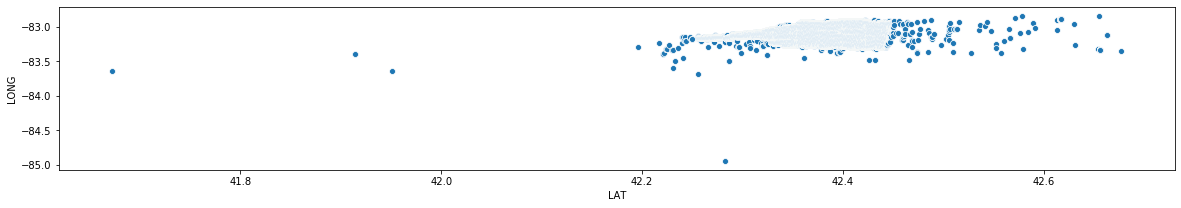

In [65]:
plt.figure(figsize=(20,3))
ax = sns.scatterplot('LAT','LONG',data=loc_grouped)

In [66]:
geolocator = Nominatim(user_agent="mylocator")
for point in loc_grouped.loc[loc_grouped['LAT']<42].iterrows():
    point = point[1]
    location = geolocator.reverse(str(point['LAT'])+", "+str(point['LONG']))
    print(location.address)

3761, Crosby Way, Westgate, Vulcan, Toledo, Lucas County, Ohio, 43606, United States of America
Assembly of God Church, Washington Street, Monroe, Monroe County, Michigan, 48161, United States of America
198, East 2nd Street, Monroe, Monroe County, Michigan, 48161, United States of America
661, 1st Street, Dundee, Dundee Township, Monroe County, Michigan, 48131, United States of America


In [67]:
loc_grouped.shape

(220743, 3)

In [68]:
loc_grouped = loc_grouped[loc_grouped['LAT']>42]

In [69]:
pt = loc_grouped.loc[loc_grouped['LONG']<-84]

In [70]:
lat,lng= str(pt.values[0][0]), str(pt.values[0][1])

In [71]:
location = geolocator.reverse(lat+", "+lng)
location.address

'652, East Drive, Marshall, Calhoun County, Michigan, 49068, United States of America'

In [72]:
loc_grouped = loc_grouped.loc[loc_grouped['LONG']>-84]

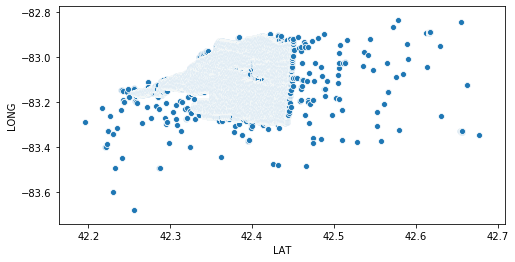

In [73]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot('LAT','LONG',data=loc_grouped)

In [ ]:
from tqdm import tqdm_notebook as tqdm
import time
c = (42.3314, -83.0458) # detroit center approx.
indexes = []
count = 0
loc_grouped['dist'] = np.sqrt(np.power(loc_grouped['LAT']-c[0],2) + np.power(loc_grouped['LONG']-c[1],2))
loc_sorted = loc_grouped.sort_values('dist',ascending=False).head(math.ceil(.05*len(loc_grouped)))
geopy.geocoders.options.default_timeout = 30
georeverse = RateLimiter(geolocator.reverse, max_retries=50)
for index,point in tqdm(loc_sorted.iterrows()):
    location = georeverse(str(point['LAT'])+", "+str(point['LONG']))
    if('detroit' not in location.address.lower()):
        indexes.append(index)
        count+=1        

In [ ]:
indexes = np.array(indexes)
f = open('./outliers.npy','wb')
np.save(f,indexes)

In [74]:
f = open('outliers.npy','rb')
indexes = np.load(f)


In [75]:
len(loc_grouped)

220738

In [76]:
loc_grouped.drop(indexes,axis=0,inplace=True)

In [77]:
len(loc_grouped)

220526

# Clustering

In [78]:
# def distance(pt1,pt2):
#     lat1,lng1 = pt1[0]*np.pi/180 , pt1[1]*np.pi/180
#     lat2,lng2 = pt2[0]*np.pi/180 , pt2[1]*np.pi/180
#     deltay = lat2 - lat1
#     deltax = (lng2-lng1)*np.cos((lat2+lat1)/2)
#     R = 6371e3
#     d = R*np.sqrt(np.power(deltax,2)+np.power(deltay,2))
#     return d

def distance(pt,c):
    pt = pt*np.pi/180
    c = c*np.pi/180
    lat,lng = c.T[0],c.T[1]
    deltay = lat - pt[0]
    deltax = (lng - pt[1])*np.cos((lat+pt[0])/2)
    R = 6371e3
    d = R*np.sqrt(np.power(deltax,2)+np.power(deltay,2))
    return d.min(), np.argmin(d)



In [79]:
loc_grouped.reset_index(drop=True,inplace=True)

In [78]:
distance((42.216800,-83.226700),(42.240100,-83.236500))

2713.5856160719904

In [80]:
points = np.array(loc_grouped[['LAT','LONG']])
# points = points*(np.pi/180)

In [82]:
#1. Find first k points such that min dist b/w any of them is maximized
ids = np.random.randint(len(points),size=10000)
subset = points[ids]
# mat = pairwise_distances(subset,metric=distance)


In [85]:
c_i = [0]
for count in tqdm(range(1,1000)):
    maxd = 0
    max_i = 0
    for i in range(len(subset)):
        if(i not in c_i):
            dis = distance(subset[i],subset[c_i])
            d , _ = dis[0],dis[1]
            if(maxd<d):
                maxd = d
                max_i = i
    c_i.append(max_i)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ishaan/ishaan/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ishaan/ishaan/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [86]:
len(c_i)

1000

In [87]:
pickle.dump(c_i,open('initial_centres.pkl','wb'))
pickle.dump(ids,open('centre_ids','wb'))

In [103]:
c_i = pickle.load(open('initial_centres.pkl','rb'))

In [92]:
centres = ids[c_i]
c_pt = list(points[centres])
buildings = np.reshape(centres, (len(centres),1)).tolist()
# f =open('cluster_data_100000.pkl','rb')
# buildings = pickle.load(f)
# f.close()
# f=open('cluster_centers_100000.pkl','rb')
# c_pt = pickle.load(f)
# f.close()

In [93]:
clustered = set([point for cluster in buildings for point in cluster])

In [94]:
for i in tqdm(range(len(points))):
    pt = points[i]
    if(i not in clustered):
        min_d = np.inf
        sel = 0
#         for j,c in enumerate(c_pt):
#             d = distance(pt,c)
#             if(min_d>d):
#                 min_d = d
#                 sel = j
        min_d,sel = distance(np.array(pt),np.array(c_pt))
        if(min_d<=100):
            buildings[sel].append(i)
            cl = points[buildings[sel]]
            newc = np.mean(cl,axis=0)
            c_pt[sel] = newc
        else:
            c_pt.append(pt)
            buildings.append([i])
        if(i%10000==0):
            f=open('./checkpoints/cluster_data_'+str(i)+'.pkl','wb')
            pickle.dump(buildings,f)
            f.close()
            f=open('./checkpoints/cluster_centers_'+str(i)+'.pkl','wb')
            pickle.dump(c_pt,f)
            f.close()
        
 

In [96]:
c_pt = np.stack(c_pt,axis=0)

In [98]:
c_pt.shape

(13280, 2)

In [102]:
pickle.dump(c_pt, open('centers_final.pkl','wb'))
pickle.dump(buildings, open('clusters_final.pkl','wb'))